In [ ]:
from pathlib import Path
import os
import elabapi_python as elabapi
import matplotlib.pyplot as plt
import numpy as np
%matplotlib widget

base_dir = Path().resolve()
if base_dir.name == 'notebooks':
    os.chdir(base_dir.parent)
    base_dir = Path().resolve()

from src.api_elab import change_text, text_preferred
from src.stimulus_analysis import load_and_preprocess, detect_stimuli
from src.peak_detection import identify_peak_flexion

[0, 2, 4, 1, 3, 5, 7]


In [2]:
# Change the ID to the name of the participant you want to analyze
ID = "02DERAIN"
participant = "01MALEFR"

data_path = base_dir / "data"
IOI = []

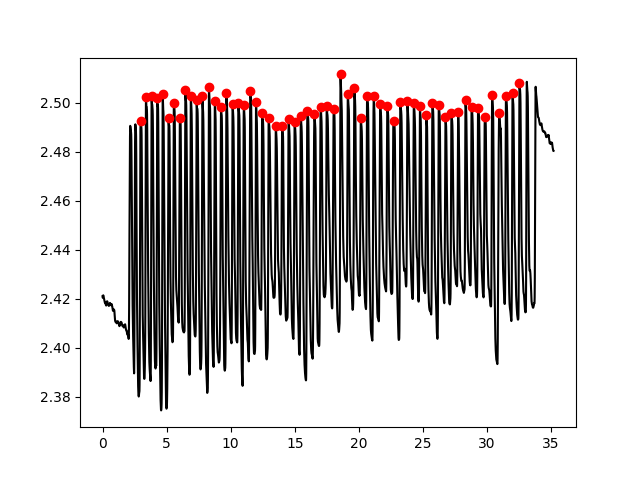

In [3]:
# Peak identification for the first trial
file_path_1 = data_path / ID / f"{ID}_Pref__1.csv"
t, mov, sound = load_and_preprocess(file_path_1)
stim_onset, stim_times, plateaus, frequencies, task_onset, task_offset = detect_stimuli(sound, task="pref")

# PARAMETERS FOR PEAK DETECTION
# =============================
peak_threshold = 50  # Default: 50
min_velocity_sum = 60  # Default: 60
# =============================
peaks = identify_peak_flexion(
    mov, stim_onset, plateaus, 
    peak_threshold=peak_threshold, min_velocity_sum=min_velocity_sum
)

IOI_1 = np.diff(peaks)/5000
IOI.extend([(IOI_val, 1) for IOI_val in IOI_1])

plt.figure()
plt.plot(t, mov, "k")
plt.plot(t[peaks], mov[peaks], "ro")

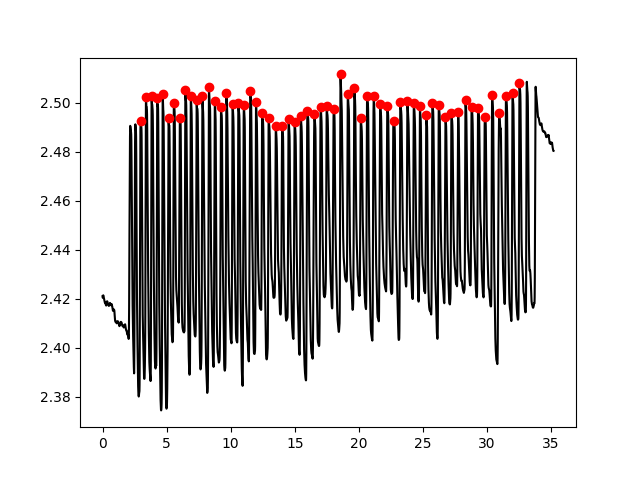

In [4]:
# Peak identification for the second trial
file_path_2 = data_path / ID / f"{ID}_Pref__2.csv"
t, mov, sound = load_and_preprocess(file_path_2)
stim_onset, stim_times, plateaus, frequencies, task_onset, task_offset = detect_stimuli(sound, task="pref")

# PARAMETERS FOR PEAK DETECTION
# =============================
peak_threshold = 50  # Default: 50
min_velocity_sum = 60  # Default: 60
# =============================
peaks = identify_peak_flexion(
    mov, stim_onset, plateaus, 
    peak_threshold=peak_threshold, min_velocity_sum=min_velocity_sum
)

IOI_2 = np.diff(peaks)/5000
IOI.extend([(IOI_val, 2) for IOI_val in IOI_2])

plt.figure()
plt.plot(t, mov, "k")
plt.plot(t[peaks], mov[peaks], "ro")

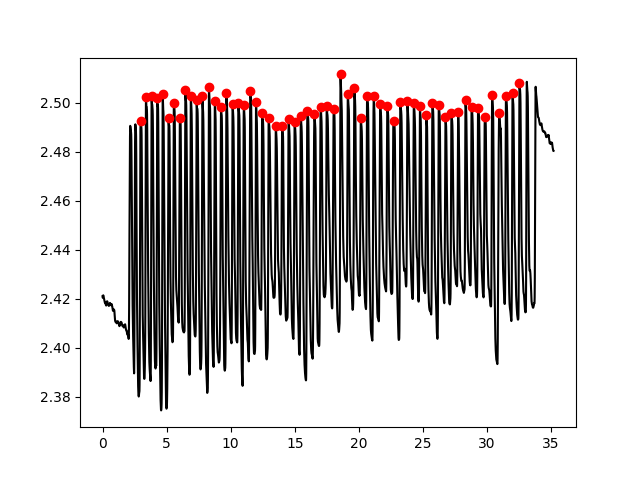

In [5]:
# Peak identification for the third trial
file_path_3 = data_path / ID / f"{ID}_Pref__3.csv"
t, mov, sound = load_and_preprocess(file_path_3)
stim_onset, stim_times, plateaus, frequencies, task_onset, task_offset = detect_stimuli(sound, task="pref")

# PARAMETERS FOR PEAK DETECTION
# =============================
peak_threshold = 50  # Default: 50
min_velocity_sum = 60  # Default: 60
# =============================
peaks = identify_peak_flexion(
    mov, stim_onset, plateaus, 
    peak_threshold=peak_threshold, min_velocity_sum=min_velocity_sum
)

IOI_3 = np.diff(peaks)/5000
IOI.extend([(IOI_val, 3) for IOI_val in IOI_3])

plt.figure()
plt.plot(t, mov, "k")
plt.plot(t[peaks], mov[peaks], "ro")

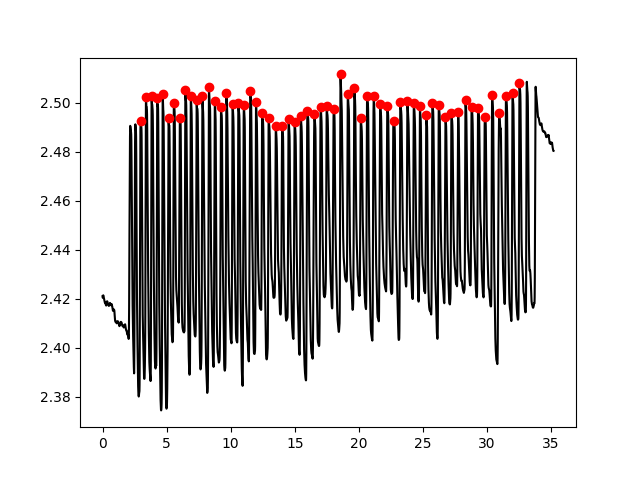

In [6]:
# Peak identification for the third trial
file_path_4 = data_path / ID / f"{ID}_Pref__4.csv"
t, mov, sound = load_and_preprocess(file_path_4)
stim_onset, stim_times, plateaus, frequencies, task_onset, task_offset = detect_stimuli(sound, task="pref")

# PARAMETERS FOR PEAK DETECTION
# =============================
peak_threshold = 50  # Default: 50
min_velocity_sum = 60  # Default: 60
# =============================
peaks = identify_peak_flexion(
    mov, stim_onset, plateaus, 
    peak_threshold=peak_threshold, min_velocity_sum=min_velocity_sum
)

IOI_4 = np.diff(peaks)/5000
IOI.extend([(IOI_val, 4) for IOI_val in IOI_4])

plt.figure()
plt.plot(t, mov, "k")
plt.plot(t[peaks], mov[peaks], "ro")

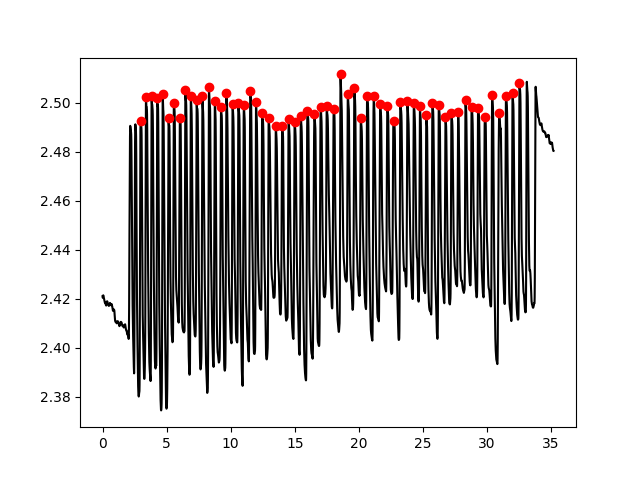

In [7]:
# Peak identification for the third trial
file_path_5 = data_path / ID / f"{ID}_Pref__5.csv"
t, mov, sound = load_and_preprocess(file_path_3)
stim_onset, stim_times, plateaus, frequencies, task_onset, task_offset = detect_stimuli(sound, task="pref")

# PARAMETERS FOR PEAK DETECTION
# =============================
peak_threshold = 50  # Default: 50
min_velocity_sum = 60  # Default: 60
# =============================
peaks = identify_peak_flexion(
    mov, stim_onset, plateaus, 
    peak_threshold=peak_threshold, min_velocity_sum=min_velocity_sum
)

IOI_5 = np.diff(peaks)/5000
IOI.extend([(IOI_val, 5) for IOI_val in IOI_5])

plt.figure()
plt.plot(t, mov, "k")
plt.plot(t[peaks], mov[peaks], "ro")

(0.0, 1.0)

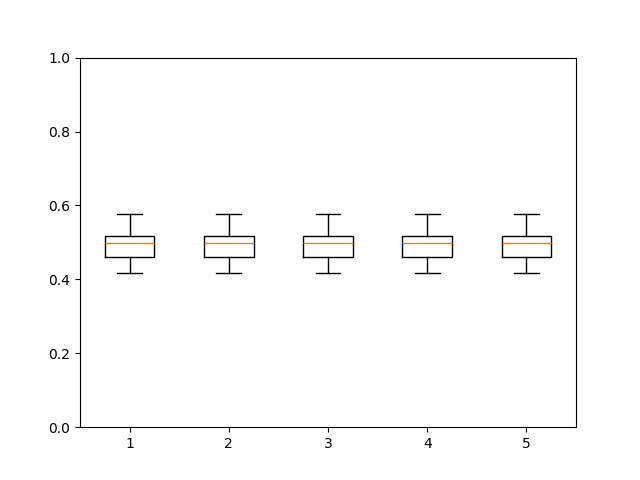

In [8]:
# Make a boxplot of the IOI values per trial
plt.figure()
plt.boxplot([IOI_1, IOI_2, IOI_3, IOI_4, IOI_5])
plt.ylim([0, 1])


In [9]:
# Calculate the coefficient of variation for the IOI values
IOI = np.array(IOI)
IOI[:,0] = 1/IOI[:,0]
CV = np.std(IOI[:, 0]) / np.mean(IOI[:, 0]) * 100
print(f"CV all IOIs: {round(CV,2)}%")

# Calculate mean and sd
IOI_mean = np.array([np.mean(IOI[IOI[:, 1] == i, 0]) for i in range(1, 6)])
IOI_sd = np.array([np.std(IOI[IOI[:, 1] == i, 0]) for i in range(1, 6)])

CV_mean = np.std(IOI_mean) / np.mean(IOI_mean) * 100
print(f"CV trials: {round(CV_mean,2)}%")

print("")
print("       1      |       2       |       3       |       4       |       5       |")
print("_______________________________________________________________________________")
print(
    f"{round(IOI_mean[0], 2)} (± {round(IOI_sd[0], 2)}) | {round(IOI_mean[1], 2)} (± {round(IOI_sd[1], 2)}) | " 
    f"{round(IOI_mean[2], 2)} (± {round(IOI_sd[2], 2)}) | {round(IOI_mean[3], 2)} (± {round(IOI_sd[3], 2)}) | "
    f"{round(IOI_mean[4], 2)} (± {round(IOI_sd[4], 2)}) |"
)


CV all IOIs: 8.63%
CV trials: 0.0%

       1      |       2       |       3       |       4       |       5       |
_______________________________________________________________________________
2.05 (± 0.18) | 2.05 (± 0.18) | 2.05 (± 0.18) | 2.05 (± 0.18) | 2.05 (± 0.18) |


In [10]:
# Print the global mean frequency
mean_freq = round(np.mean(IOI_mean), 3)
print(f"Mean frequency: {mean_freq} Hz")

# Print the slow condition and fast condition (± 20%)
print(f"Slow: {round(mean_freq * 0.8, 3)} Hz   |   Fast: {round(mean_freq * 1.2, 3)} Hz")

Mean frequency: 2.045 Hz
Slow: 1.636 Hz   |   Fast: 2.454 Hz


In [12]:
change_text(participant, text_preferred(participant, IOI_mean, IOI_sd, CV_mean))

/Users/martinleguennec/Documents/3_Thesis/Research/Project_3_CrossCultural_SMS/Protocol/Code/.venv/lib/python3.13/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'elabftw-prep.umontpellier.fr'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/Users/martinleguennec/Documents/3_Thesis/Research/Project_3_CrossCultural_SMS/Protocol/Code/.venv/lib/python3.13/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'elabftw-prep.umontpellier.fr'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/Users/martinleguennec/Documents/3_Thesis/Research/Project_3_CrossCultural_SMS/Protocol/Code/.venv/lib/python3.13/site-packages/urllib3/connectionpool.py:1097: InsecureRequestW

Text updated


/Users/martinleguennec/Documents/3_Thesis/Research/Project_3_CrossCultural_SMS/Protocol/Code/.venv/lib/python3.13/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'elabftw-prep.umontpellier.fr'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
